In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
df = pd.read_csv('Blood.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   748 non-null    int64
 1   F1      748 non-null    int64
 2   F2      748 non-null    int64
 3   F3      748 non-null    int64
 4   F4      748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [69]:
# Q1. model for prediction
X_features = df[['F1', 'F2', 'F3', 'F4']]
Y_features = df['class']
X = sm.add_constant(X)
Y = Y_features

train_X, test_X, train_Y, test_Y = train_test_split(X,Y,train_size=0.8, random_state=42) 
logit_model = sm.Logit(train_Y, train_X)
logit_model = logit_model.fit()
logit_model.summary2()

Optimization terminated successfully.
         Current function value: 0.470528
         Iterations 15


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.139     
Dependent Variable: class            AIC:              572.7517  
Date:               2023-09-27 16:16 BIC:              594.7196  
No. Observations:   598              Log-Likelihood:   -281.38   
Df Model:           4                LL-Null:          -326.61   
Df Residuals:       593              LLR p-value:      1.0453e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     15.0000                                      
-----------------------------------------------------------------
       Coef.    Std.Err.     z    P>|z|     [0.025       0.975]  
-----------------------------------------------------------------
const -0.4559      0.2008 -2.2709 0.0232      -0.8494     -0.0624
F1    -0.0988      0.0192 -5.1330 0.0000      -0.1365     -0.0611
F2     0.0000 463554.9724  0.0000 1.0000 -908551.0507 908551.0507
F3     0.0005   1854.2199  0.0000 1.0000   -3634.2037   3634.2047
F4    -0.0232      0.0066 -3.5269 0.0004      -0.0361     -0.0103
=================================================================

"""

In [76]:
# Q.2 make the model using significant features only
significant_features = logit_model.pvalues[logit_model.pvalues < 0.05].index
train_X = train_X[significant_features]
test_X = test_X[significant_features]
logit_model_new = sm.Logit(train_Y, train_X).fit()
logit_model_new.summary2()

Optimization terminated successfully.
         Current function value: 0.495096
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.094     
Dependent Variable: class            AIC:              598.1347  
Date:               2023-09-27 16:21 BIC:              611.3154  
No. Observations:   598              Log-Likelihood:   -296.07   
Df Model:           2                LL-Null:          -326.61   
Df Residuals:       595              LLR p-value:      5.4287e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -0.2543     0.1941   -1.3103   0.1901   -0.6348    0.1261
F1        -0.1236     0.0185   -6.6842   0.0000   -0.1598   -0.0874
F4         0.0007     0.0040    0.1826   0.8551   -0.0071    0.0086
=================================================================

"""

In [71]:
#3. Find which features affect the probability positively and negatively
positive_features = logit_model_new.params[logit_model_new.params > 0].index
negative_features = logit_model_new.params[logit_model_new.params < 0].index

print("Features affecting positively are : ", positive_features)
print("Features affecting negatively are : ", negative_features)

Features affecting positively are :  Index(['F4'], dtype='object')
Features affecting negatively are :  Index(['const', 'F1'], dtype='object')


In [77]:
# Youden's index for all possible cut-off probabilites
from sklearn import metrics
cutoff = np.arange(0.1, 0.91, 0.01)
youdens_index = []
cutoff_index = []
for i in cutoff:
    predicted_values = logit_model_new.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    sensitivity = confusion_matrix[1][1]/(confusion_matrix[1][1] + confusion_matrix[1][0])
    specificity = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])
    youden_index = sensitivity + specificity - 1
    youdens_index.append(youden_index)
    cutoff_index.append(i)

print("Youden index : ", youdens_index)
max_youden = -40
optimal_cutoff = -1
for i in range(0, len(youdens_index)):
    if(youdens_index[i] > max_youden) :
        max_youden = youdens_index[i]
        optimal_cutoff = cutoff_index[i]

print("\n\noptimal cutoff value is : ", optimal_cutoff)
print("max youden value at optimal cutoff", max_youden)

Youden index :  [0.220760583592442, 0.2384596986366898, 0.2384596986366898, 0.2272183688112892, 0.2272183688112892, 0.2272183688112892, 0.2537670413776607, 0.3240851470939967, 0.34130590767758906, 0.35015546519971297, 0.35015546519971297, 0.3496771107390577, 0.3496771107390577, 0.3496771107390577, 0.3585266682611816, 0.3585266682611816, 0.34919875627840224, 0.34919875627840224, 0.32217172925137527, 0.32217172925137527, 0.32217172925137527, 0.32217172925137527, 0.32217172925137527, 0.22004305190145912, 0.1655106433867497, 0.1655106433867497, 0.1473331738818464, 0.15618273140397032, 0.01961253288686926, 0.018655823965558316, -0.008371203061468657, -0.008371203061468657, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


optimal cutoff value is :  0.23999999999999994
max youden value at optimal c

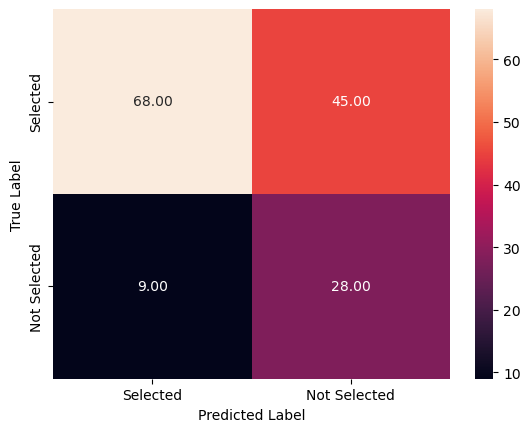



Precision of model is :  0.8831168831168831

Recall of model is :  0.6017699115044248


In [78]:
predicted_values = logit_model_new.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)

In [79]:
# Predicting the cutoff by assuming cost of predicting job as no job 5 times more than no job as job
cost_based_values = []
cost_based_cutoff_indices = []
for i in cutoff:
    predicted_values = logit_model_new.predict(test_X)
    predicted_values = (predicted_values > i).astype(int)
    confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
    cost = 5*confusion_matrix[0][1] + confusion_matrix[1][0]
    cost_based_values.append(cost)
    cost_based_cutoff_indices.append(i)
    
optimal_cutoff_cost = -1
min_cost = 1e9

for i in range(0, len(cost_based_cutoff_indices)):
    if(cost_based_values[i] < min_cost) :
        min_cost = cost_based_values[i]
        optimal_cutoff_cost = cost_based_cutoff_indices[i]

print("\nOptimal cutoff is : ", optimal_cutoff_cost)


Optimal cutoff is :  0.4199999999999998


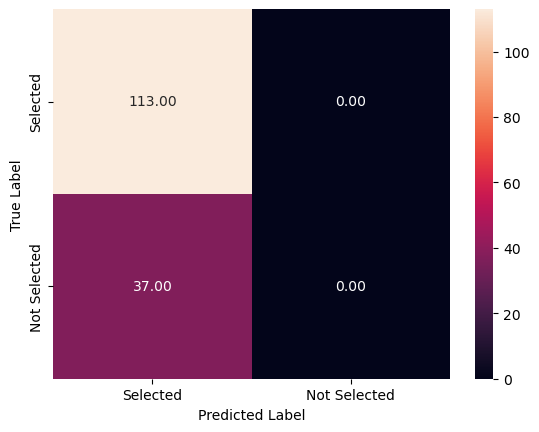



Precision of model is :  0.7533333333333333

Recall of model is :  1.0


In [80]:
# Finding the precision and recall for cost based method
predicted_values = logit_model_new.predict(test_X)
predicted_values = (predicted_values > optimal_cutoff_cost).astype(int)
confusion_matrix = metrics.confusion_matrix(test_Y, predicted_values)
sn.heatmap(confusion_matrix, annot=True, fmt='.2f', xticklabels=["Selected", "Not Selected"], yticklabels=["Selected", "Not Selected"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

precision = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[1][0])
recall = confusion_matrix[0][0]/(confusion_matrix[0][0] + confusion_matrix[0][1])

print("\n\nPrecision of model is : ", precision)
print("\nRecall of model is : ", recall)